In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [90]:
treino = pd.read_csv("train (2).csv")
teste  = pd.read_csv("test (2).csv")

In [91]:
treino.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [92]:
teste.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [93]:
treino.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [94]:
treino["ano"] = treino["datetime"].str.extract(r'(\d{4})\-').astype(int)
treino['mes'] = treino["datetime"].str.extract(r'\-(\d{2})\-').astype(int)
treino["dia"] = treino["datetime"].str.extract(r'\-(\d{2})\ ').astype(int)
treino["hora"] = treino["datetime"].str.extract(r'\ (\d{2})\:').astype(int)

In [95]:
teste["ano"] = teste["datetime"].str.extract(r'(\d{4})\-').astype(int)
teste['mes'] = teste["datetime"].str.extract(r'\-(\d{2})\-').astype(int)
teste["dia"] = teste["datetime"].str.extract(r'\-(\d{2})\ ').astype(int)
teste["hora"] = teste["datetime"].str.extract(r'\ (\d{2})\:').astype(int)

<AxesSubplot:>

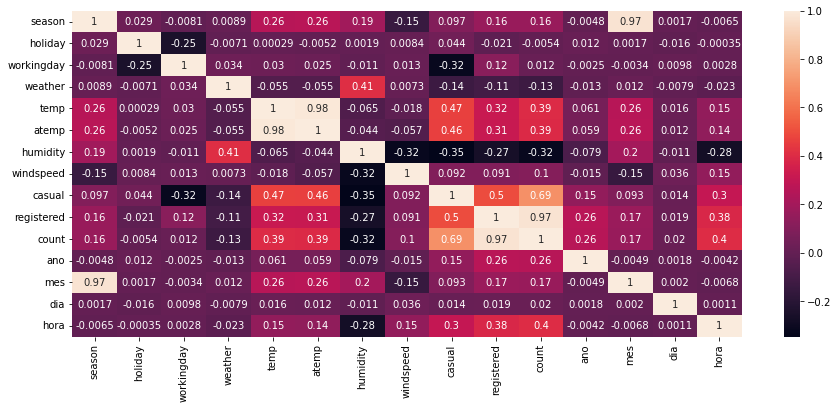

In [96]:
correlacao = treino.corr()
plt.figure(figsize=(15,6))
sns.heatmap(data=correlacao,annot=True)

In [97]:
treino['meses'] = treino['mes'] + 12*(treino['ano']-2011)
teste['meses'] = teste['mes'] + 12*(teste['ano']-2011)

treino['umidade'] = 100 - treino['humidity']
teste['umidade'] = 100 - teste['humidity']

treino['faixa_de_horario'] = (treino['hora']/6).astype(int)
teste['faixa_de_horario'] = (teste['hora']/6).astype(int)

<AxesSubplot:>

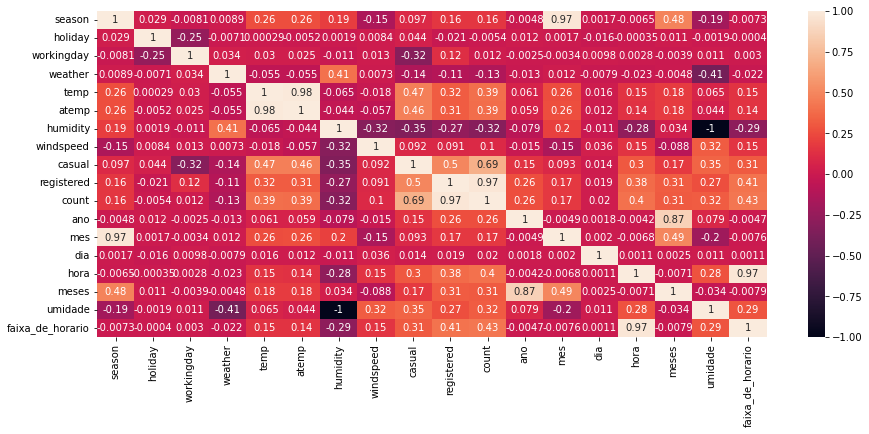

In [98]:
correlacao = treino.corr()
plt.figure(figsize=(15,6))
sns.heatmap(data=correlacao,annot=True)

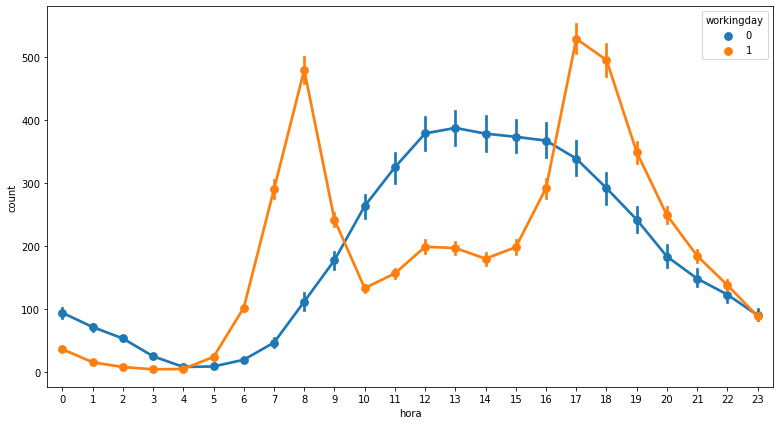

In [99]:
fig, ax = plt.subplots(figsize=(13,7))
sns.pointplot(data = treino, x=treino['hora'], y=treino['count'], hue=treino['workingday'], ax=ax)
plt.show()

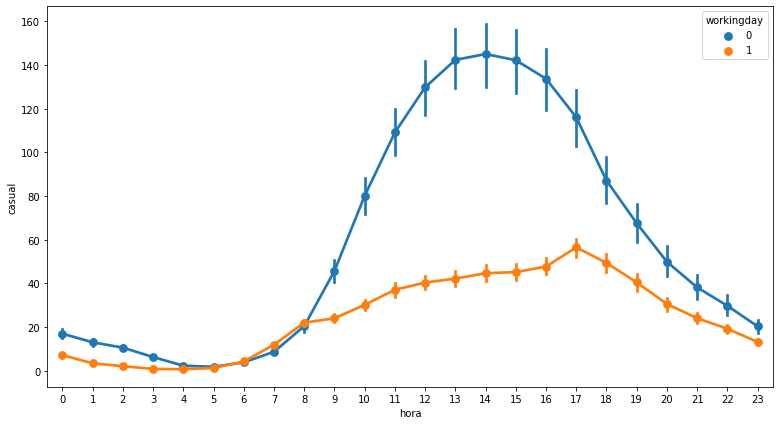

In [100]:
fig, ax = plt.subplots(figsize=(13,7))
sns.pointplot(data = treino, x=treino['hora'], y=treino['casual'], hue=treino['workingday'], ax=ax)
plt.show()

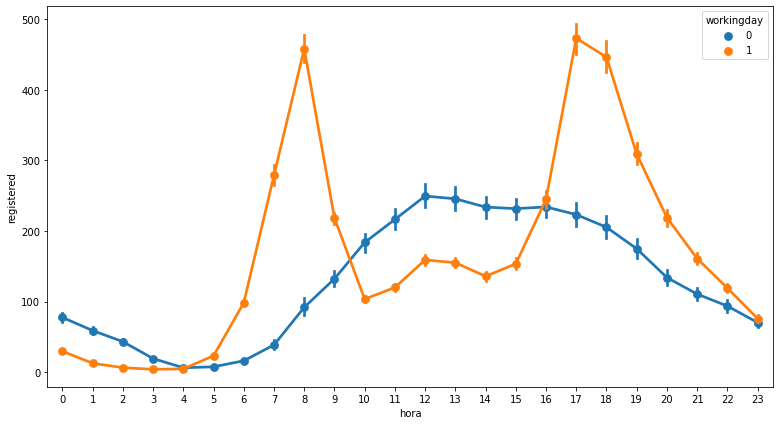

In [101]:
fig, ax = plt.subplots(figsize=(13,7))
sns.pointplot(data = treino, x=treino['hora'], y=treino['registered'], hue=treino['workingday'], ax=ax)
plt.show()

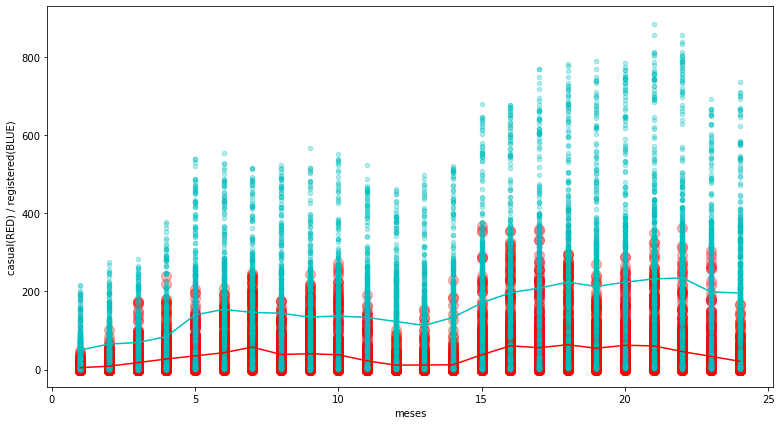

In [102]:
val_medio_x = []
val_medio_x2 = []
x = 'meses'
y = 'casual'
y1 = 'registered'

for i in treino[x]:
    val = treino.loc[treino[x]==i, y].mean()
    val_medio_x.append(val)
for i in treino[x]:
    val = treino.loc[treino[x]==i, y1].mean()
    val_medio_x2.append(val)

plt.figure(figsize=(13,7))

plt.plot(treino[x], val_medio_x, c='r')
plt.plot(treino[x], val_medio_x2, c='c')

plt.scatter(treino[x], treino[y], alpha=0.3, c='r', s=100)  # Vermelho
plt.scatter(treino[x], treino[y1], alpha=0.3, c='c', s=20)     # Azul
plt.ylabel(y + '(RED) / ' + y1 + '(BLUE)')
plt.xlabel(x)
plt.show()

In [103]:
treino = treino.drop(['season','holiday','weather','humidity','windspeed','ano','mes','dia','hora'],axis=1)
teste = teste.drop(['season','holiday','weather','humidity','windspeed','ano','mes','dia','hora'],axis=1)

In [104]:
treino.head()

,datetime,workingday,temp,atemp,casual,registered,count,meses,umidade,faixa_de_horario
0,2011-01-01 00:00:00,0,9.84,14.395,3,13,16,1,19,0
1,2011-01-01 01:00:00,0,9.02,13.635,8,32,40,1,20,0
2,2011-01-01 02:00:00,0,9.02,13.635,5,27,32,1,20,0
3,2011-01-01 03:00:00,0,9.84,14.395,3,10,13,1,25,0
4,2011-01-01 04:00:00,0,9.84,14.395,0,1,1,1,25,0


In [105]:
teste.head()

,datetime,workingday,temp,atemp,meses,umidade,faixa_de_horario
0,2011-01-20 00:00:00,1,10.66,11.365,1,44,0
1,2011-01-20 01:00:00,1,10.66,13.635,1,44,0
2,2011-01-20 02:00:00,1,10.66,13.635,1,44,0
3,2011-01-20 03:00:00,1,10.66,12.880,1,44,0
4,2011-01-20 04:00:00,1,10.66,12.880,1,44,0


In [106]:
x_treino = treino[['temp','atemp','faixa_de_horario','workingday','umidade','meses']]
y_treino = treino['casual']
x_teste = teste[['temp','atemp','faixa_de_horario','workingday','umidade','meses']]

In [107]:
modelo = RandomForestRegressor(random_state=0, n_estimators=150,criterion='mse',n_jobs=-1)               
modelo.fit(x_treino, y_treino) 

y_pred = modelo.predict(x_teste)                                          

In [108]:
print(y_pred)
y_pred = np.round(y_pred)
print(y_pred)

[ 0.68488889  1.27922222  1.27922222 ... 10.78333333  6.265
  4.28088889]
[ 1.  1.  1. ... 11.  6.  4.]


In [109]:
x1_treino = treino[['temp','atemp','faixa_de_horario','workingday','umidade','meses']]
y1_treino = treino['registered']
x1_teste = teste[['temp','atemp','faixa_de_horario','workingday','umidade','meses']]

In [110]:
modelo = RandomForestRegressor(random_state=42, n_estimators=1000)               
modelo.fit(x1_treino, y1_treino) 

y1_pred = modelo.predict(x1_teste)                          

In [111]:
print(y1_pred)
y1_pred = np.round(y1_pred)
print(y1_pred)

[  5.25345238   4.94238571   4.94238571 ... 284.22053333 121.969075
 117.15258571]
[  5.   5.   5. ... 284. 122. 117.]


In [112]:
resultado = pd.DataFrame()
resultado["datetime"] = teste["datetime"]
resultado["casual"] = y_pred
resultado["registered"] = y1_pred
resultado["count"] = resultado["casual"] + resultado["registered"]
resultado = resultado.drop(['casual','registered'],axis=1)

In [113]:
resultado.set_index("datetime",inplace=True)

#resultado.to_csv('quinta_tentativa.csv')